In [1]:
#Customer churn
#It is necessary to predict whether the client will leave the bank in the near
#future or not. We have been provided with historical data on customer behavior
#and termination of agreements with the bank.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn=pd.read_csv(r"C:\Users\Admin\Documents\GitHub\edu-python\Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.shape

(10000, 14)

In [5]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
#From the above, we will not require the first 2 attributes as the are specific to a customer. 
#It is borderline with the surname as this would result to profiling so we exclude this as well.
churn=churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# Data-type Conversion

In [8]:
churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
churn.Geography=le.fit_transform(churn.Geography)
churn.Gender=le.fit_transform(churn.Gender)

In [10]:
churn.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Model

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,precision_score,recall_score

In [12]:
churn.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
x=churn.iloc[:,0:-1]
y=churn.iloc[:,-1]

In [14]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [17]:
lg.fit(x_train,y_train)

LogisticRegression()

In [18]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
prob=lg.predict_proba(x_test)
#prob

In [20]:
df=pd.DataFrame(prob)
#df

In [21]:
from sklearn.metrics import confusion_matrix
lg_cf=confusion_matrix(y_test,lg_p)
lg_cf 

array([[1542,   35],
       [ 403,   20]], dtype=int64)

In [22]:
lg_ac=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac

78.10000000000001

In [23]:
a=f1_score(y_test,lg_p)
b=precision_score(y_test,lg_p)
c=recall_score(y_test,lg_p)

In [24]:
print(classification_report(y_test,lg_p))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1577
           1       0.36      0.05      0.08       423

    accuracy                           0.78      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [26]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
dt_p=dt.predict(x_test)
dt_p

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
dt_cf=confusion_matrix(y_test,dt_p)
dt_cf

array([[1350,  227],
       [ 205,  218]], dtype=int64)

In [29]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

78.4

In [30]:
a1=f1_score(y_test,dt_p)
b1=precision_score(y_test,dt_p)
c1=recall_score(y_test,dt_p)

In [31]:
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1577
           1       0.49      0.52      0.50       423

    accuracy                           0.78      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.78      0.79      2000



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
rf_p=rf.predict(x_test)

In [35]:
rf_cf=confusion_matrix(y_test,rf_p)
rf_cf

array([[1520,   57],
       [ 204,  219]], dtype=int64)

In [36]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

86.95

In [37]:
a2=f1_score(y_test,rf_p)
b2=precision_score(y_test,rf_p)
c2=recall_score(y_test,rf_p)

In [38]:
print(classification_report(y_test,rf_p))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.79      0.52      0.63       423

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
knn_p=knn.predict(x_test)

In [42]:
knn_cf=confusion_matrix(y_test,knn_p)
knn_cf

array([[1483,   94],
       [ 390,   33]], dtype=int64)

In [43]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

75.8

In [44]:
a3=f1_score(y_test,knn_p)
b3=precision_score(y_test,knn_p)
c3=recall_score(y_test,knn_p)

In [45]:
print(classification_report(y_test,knn_p))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1577
           1       0.26      0.08      0.12       423

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.68      0.76      0.70      2000



# XGB(XGBoost)

In [46]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [47]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
xgb_p=xgb.predict(x_test)

In [49]:
xgb_cf=confusion_matrix(y_test,xgb_p)
xgb_cf

array([[1484,   93],
       [ 193,  230]], dtype=int64)

In [50]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

85.7

In [51]:
a4=f1_score(y_test,xgb_p)
b4=precision_score(y_test,xgb_p)
c4=recall_score(y_test,xgb_p)

In [52]:
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1577
           1       0.71      0.54      0.62       423

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



# SVM

In [53]:
from sklearn.svm import SVC
svm=SVC()

In [54]:
svm.fit(x_train,y_train)

SVC()

In [55]:
svm_p=svm.predict(x_test)

In [56]:
svm_cf=confusion_matrix(y_test,svm_p)
svm_cf

array([[1577,    0],
       [ 423,    0]], dtype=int64)

In [57]:
svm_ac=svm_cf.diagonal().sum()/svm_cf.sum()*100
svm_ac

78.85

In [58]:
a5=f1_score(y_test,svm_p)
b5=precision_score(y_test,svm_p)
c5=recall_score(y_test,svm_p)

In [59]:
print(classification_report(y_test,svm_p))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



# Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [61]:
nb.fit(x_train,y_train)

MultinomialNB()

In [62]:
nb_p=nb.predict(x_test)
nb_p

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [63]:
nb_cf=confusion_matrix(y_test,nb_p)
nb_cf

array([[876, 701],
       [203, 220]], dtype=int64)

In [64]:
nb_ac=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_ac

54.800000000000004

In [65]:
a6=f1_score(y_test,nb_p)
b6=precision_score(y_test,nb_p)
c6=recall_score(y_test,nb_p)

In [66]:
print(classification_report(y_test,nb_p))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66      1577
           1       0.24      0.52      0.33       423

    accuracy                           0.55      2000
   macro avg       0.53      0.54      0.49      2000
weighted avg       0.69      0.55      0.59      2000



In [67]:
algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
accuracy=[lg_ac,dt_ac,rf_ac,knn_ac,xgb_ac,svm_ac,nb_ac]
f1=[a,a1,a2,a3,a4,a5,a6]
precision=[b,b1,b2,b3,b4,b5,b6]
recall=[c,c1,c2,c3,c4,c5,c6]

In [68]:
model1=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy,"F1-score":f1,"Precision":precision,"Recall":recall})
model1

,Algorithm,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,78.10,0.083682,0.363636,0.047281
1,Decision Tree,78.40,0.502304,0.489888,0.515366
2,Random Forest,86.95,0.626609,0.793478,0.517730
3,KNN,75.80,0.120000,0.259843,0.078014
4,XGB,85.70,0.616622,0.712074,0.543735
5,SVM,78.85,0.000000,0.000000,0.000000
6,Naive Bayes,54.80,0.327381,0.238871,0.520095


Conclusion= In general, the performance of all models is very low, but if it is necessary to choose the best model,if you have to pick a single model it should be Random Forest and XGB because the accuracy,F1 score,Recall,precesion of model is good as compare to other model.

# Class Imbalanced

# Random Oversampling

In [69]:
churn.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

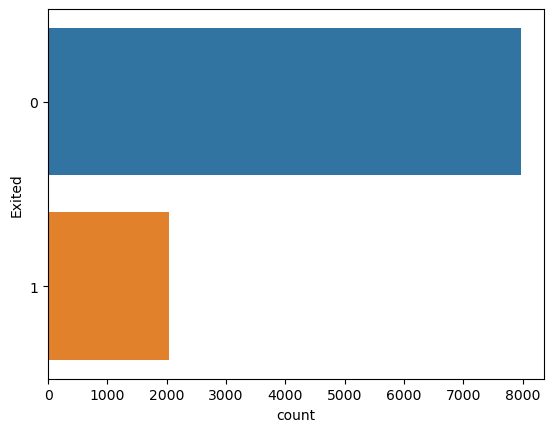

In [70]:
sns.countplot(data=churn,y="Exited")
plt.show()

So about 20% of the customers have churned and 79% of the customer are retained.

In [71]:
c_0,c_1=churn["Exited"].value_counts()
c_0,c_1

(7963, 2037)

In [72]:
train_0=churn[churn["Exited"]==0]
train_1=churn[churn["Exited"]==1]
train_0.shape,train_1.shape

((7963, 11), (2037, 11))

In [73]:
class_1over=train_1.sample(c_0,replace=True)
class_1over.head()
class_1over.shape,train_0.shape

((7963, 11), (7963, 11))

In [74]:
class1_0=pd.concat([class_1over,train_0],axis=0)
class1_0.shape

(15926, 11)

In [75]:
class1_0.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [76]:
class1_0.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1317,789,0,1,37,3,0.00,1,1,0,121883.87,1
6895,610,1,1,49,6,113882.33,1,1,0,195813.81,1


In [77]:
x1=class1_0.iloc[:,0:-1]
y1=class1_0.iloc[:,-1]

In [78]:
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,test_size=0.2,random_state=100)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((12740, 10), (3186, 10), (12740,), (3186,))

# Correlation

In [79]:
churn_cor=churn.corr()
churn_cor

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


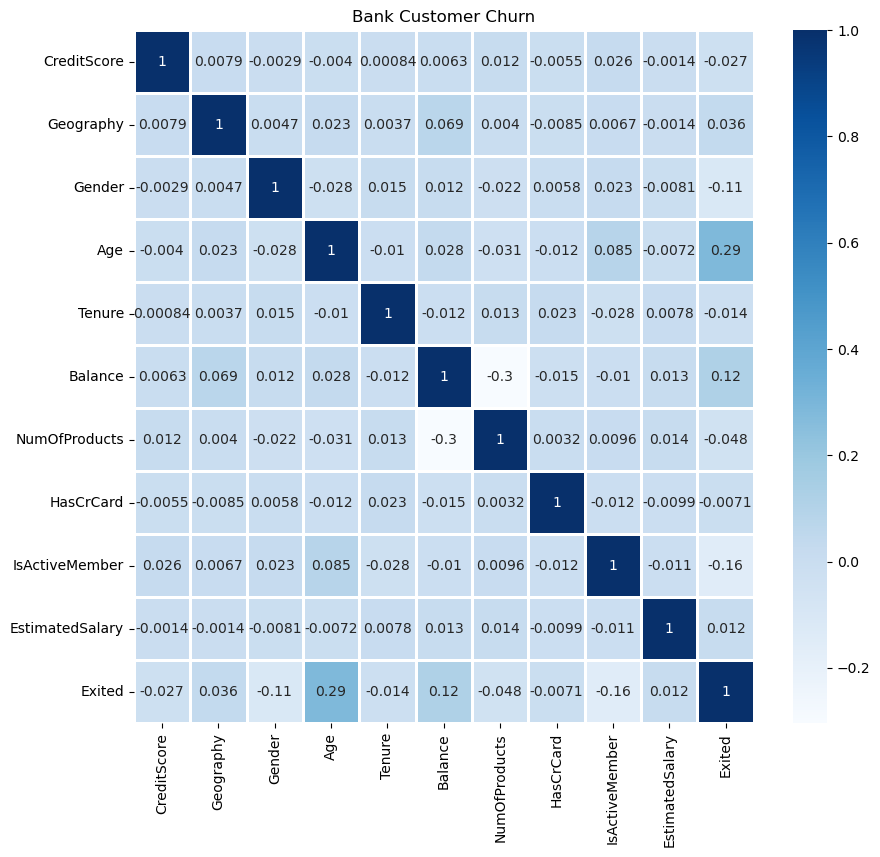

In [80]:
plt.figure(figsize=(10,9))
heatmap=sns.heatmap(churn_cor,linewidth=2,annot=True,cmap=plt.cm.Blues)
plt.title("Bank Customer Churn")
plt.show()

There is no high correlation between features

# Outlier Treatment

In [81]:
class1_0.skew()

CreditScore       -0.094249
Geography          0.437095
Gender            -0.058300
Age                0.592497
Tenure             0.021257
Balance           -0.276383
NumOfProducts      1.198039
HasCrCard         -0.859885
IsActiveMember     0.199420
EstimatedSalary   -0.018491
Exited             0.000000
dtype: float64

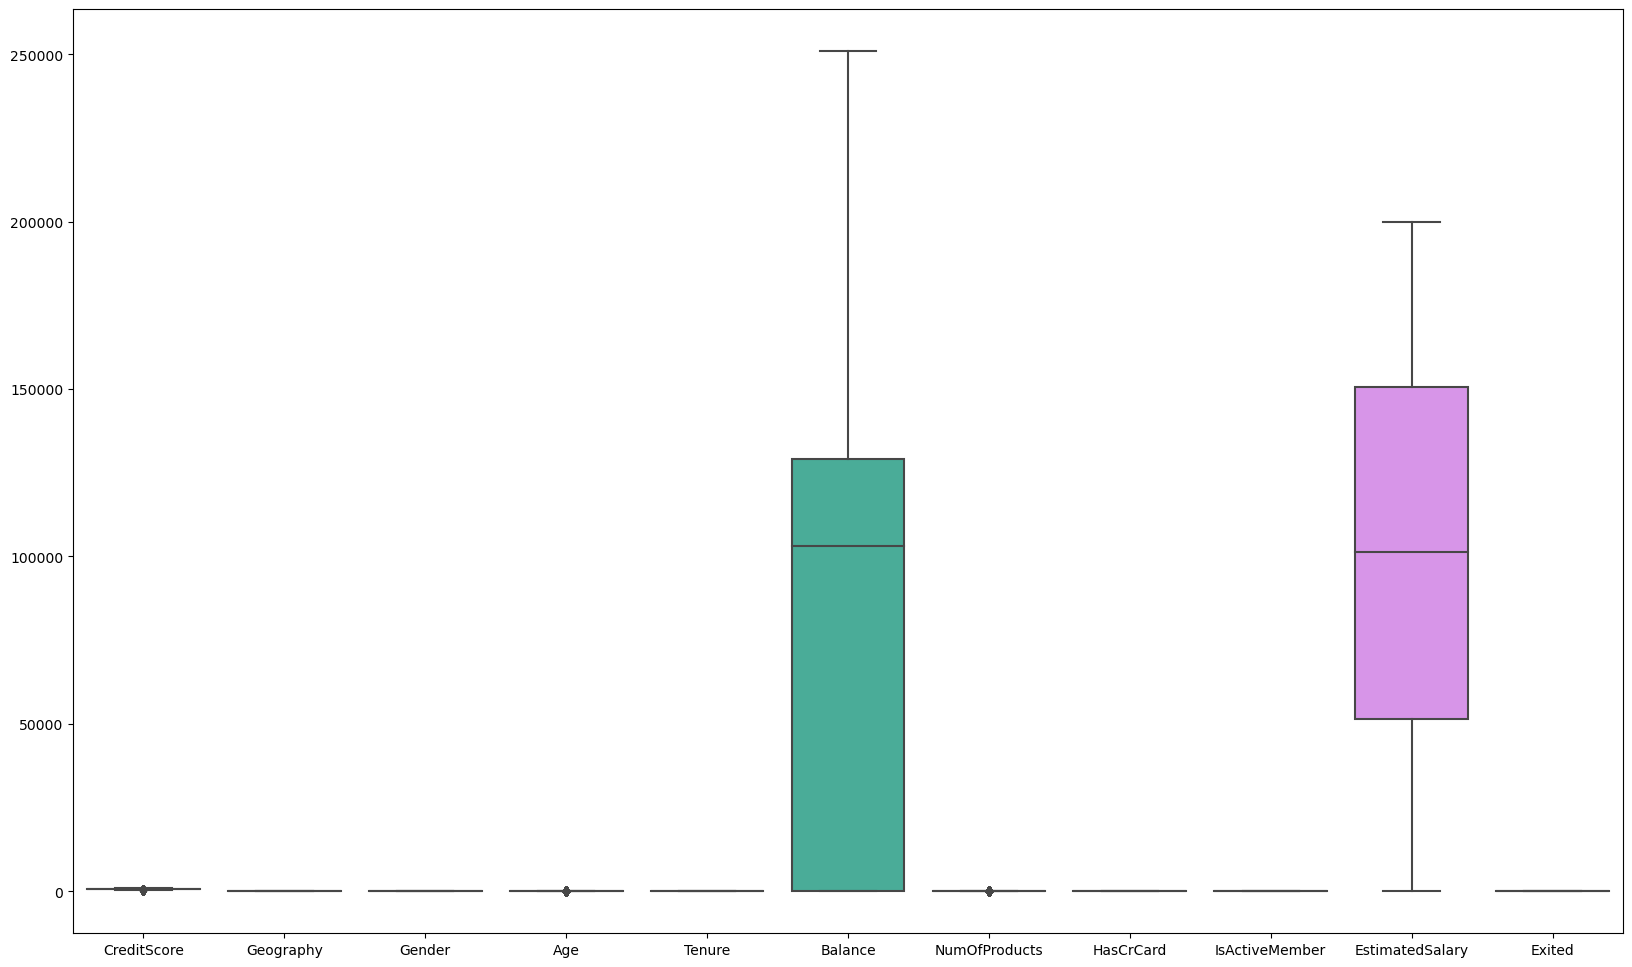

In [82]:
plt.figure(figsize=(20,12))
sns.boxplot(data=class1_0)
plt.show()

<Axes: ylabel='CreditScore'>

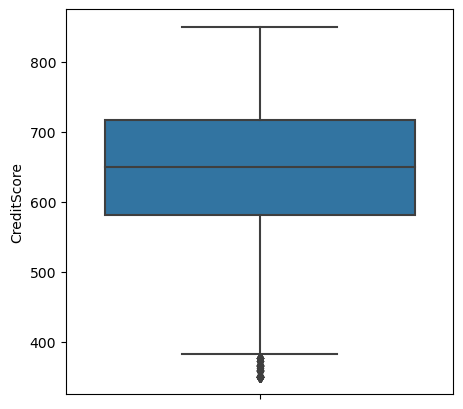

In [83]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=class1_0,y="CreditScore")

<Axes: xlabel='CreditScore', ylabel='Density'>

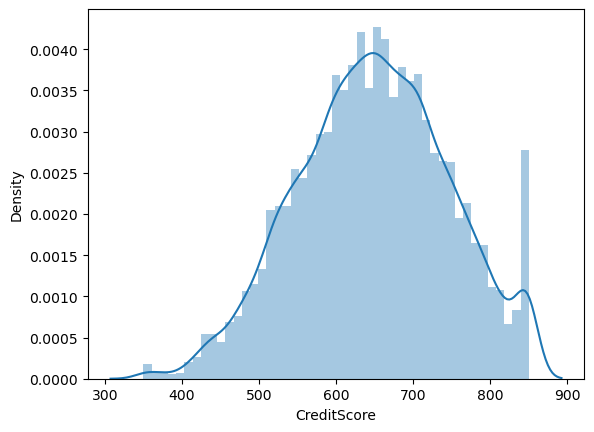

In [84]:
sns.distplot(class1_0.CreditScore) 

<Axes: >

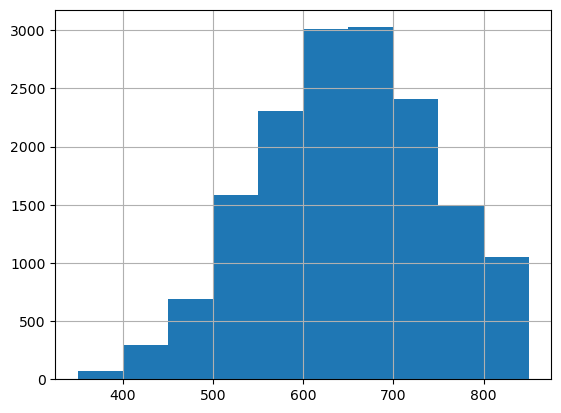

In [85]:
class1_0.CreditScore.hist()

In [86]:
ub1=class1_0.CreditScore.mean()+3*class1_0.CreditScore.std()
lb1=class1_0.CreditScore.mean()-3*class1_0.CreditScore.std()
print(ub1,lb1)

942.8177198525971 354.57710621797946


In [87]:
class1_0.loc[class1_0["CreditScore"]<355.04,"CreditScore"]=355.04

<Axes: xlabel='CreditScore', ylabel='Density'>

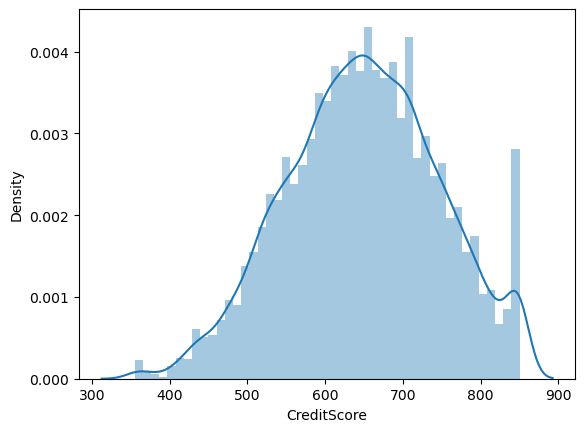

In [88]:
sns.distplot(class1_0.CreditScore) 

<Axes: >

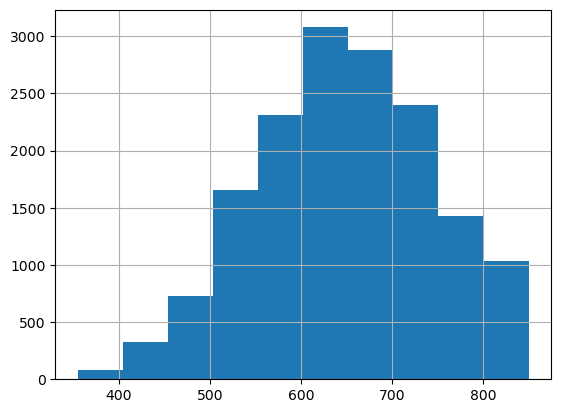

In [89]:
class1_0.CreditScore.hist()

<Axes: ylabel='Age'>

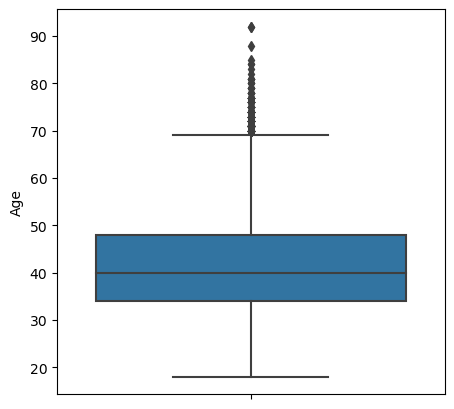

In [90]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=class1_0,y="Age")

<Axes: xlabel='Age', ylabel='Density'>

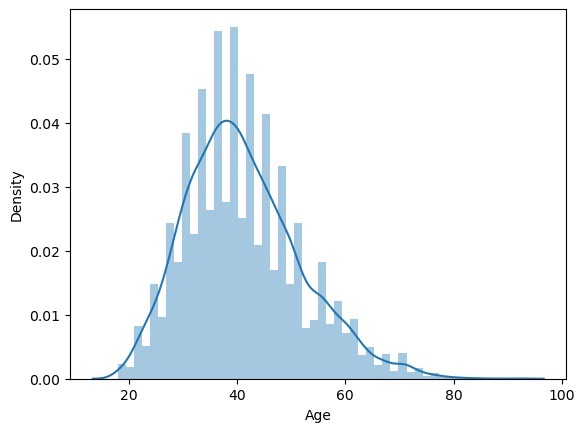

In [91]:
sns.distplot(class1_0.Age) 

<Axes: >

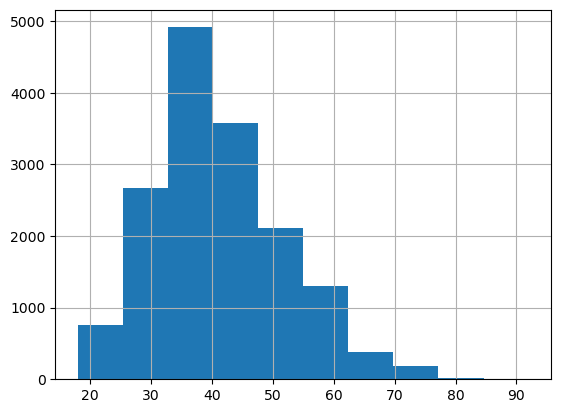

In [92]:
class1_0.Age.hist()

In [93]:
ub1=class1_0.Age.mean()+3*class1_0.Age.std()
lb1=class1_0.Age.mean()-3*class1_0.Age.std()
print(ub1,lb1)

73.0251683871187 9.26605351417479


In [94]:
class1_0.loc[class1_0["Age"]>72.97,"Age"]=72.97

<Axes: xlabel='Age', ylabel='Density'>

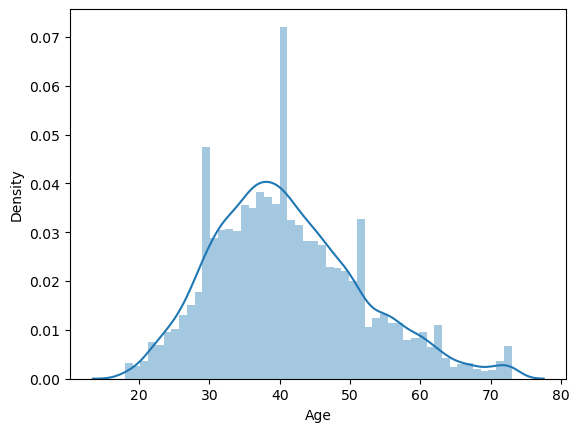

In [95]:
sns.distplot(class1_0.Age) 

<Axes: >

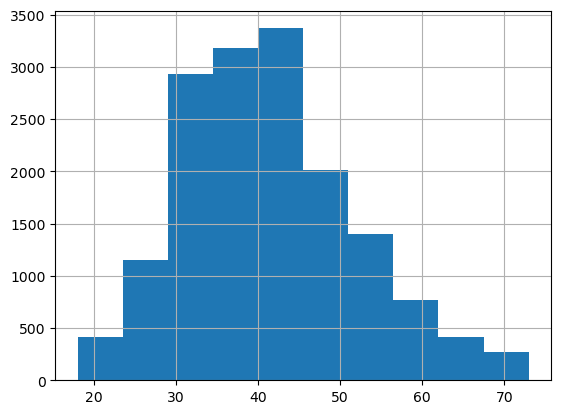

In [96]:
class1_0.Age.hist()

In [97]:
class1_0.skew()

CreditScore       -0.092547
Geography          0.437095
Gender            -0.058300
Age                0.543239
Tenure             0.021257
Balance           -0.276383
NumOfProducts      1.198039
HasCrCard         -0.859885
IsActiveMember     0.199420
EstimatedSalary   -0.018491
Exited             0.000000
dtype: float64

# Visualization

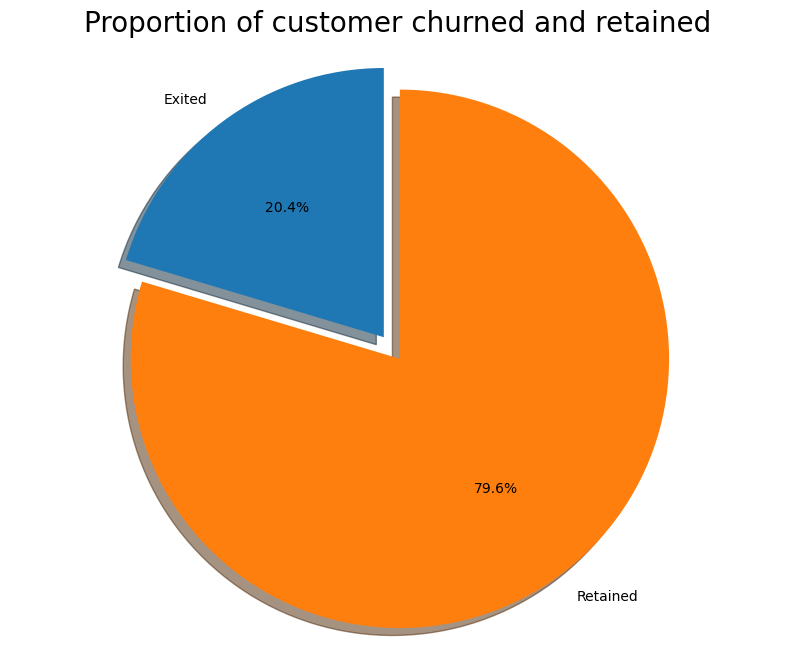

In [98]:
labels = 'Exited', 'Retained'
sizes = [churn.Exited[churn['Exited']==1].count(), churn.Exited[churn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

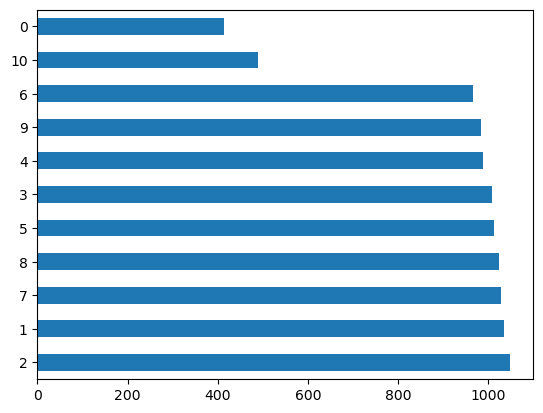

In [99]:
churn.Tenure.value_counts().plot.barh()
plt.show()

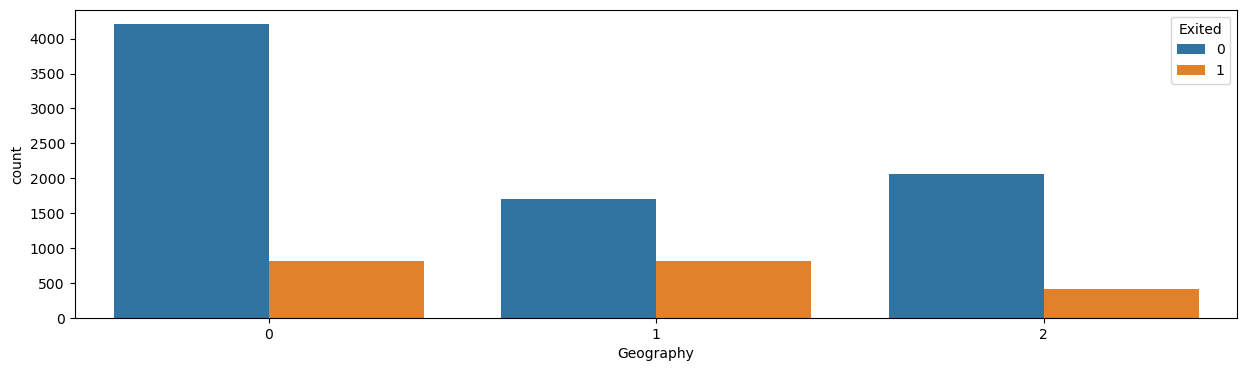

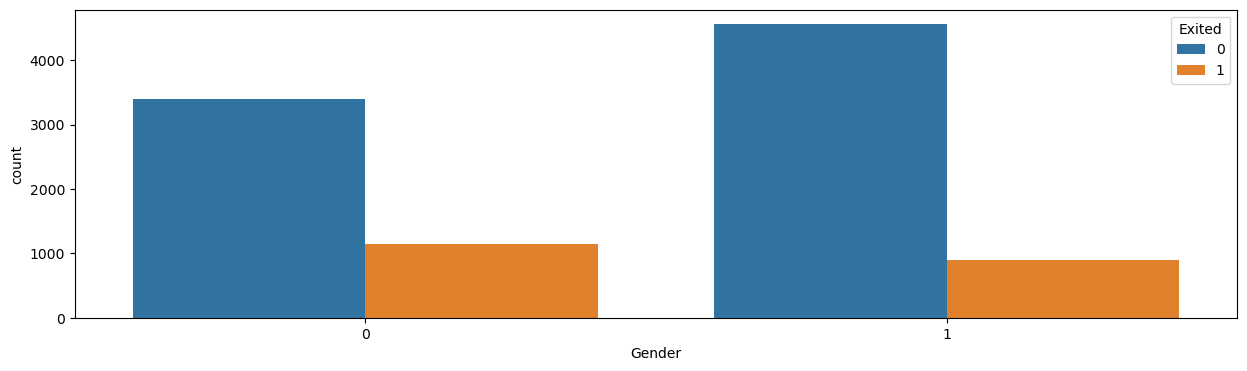

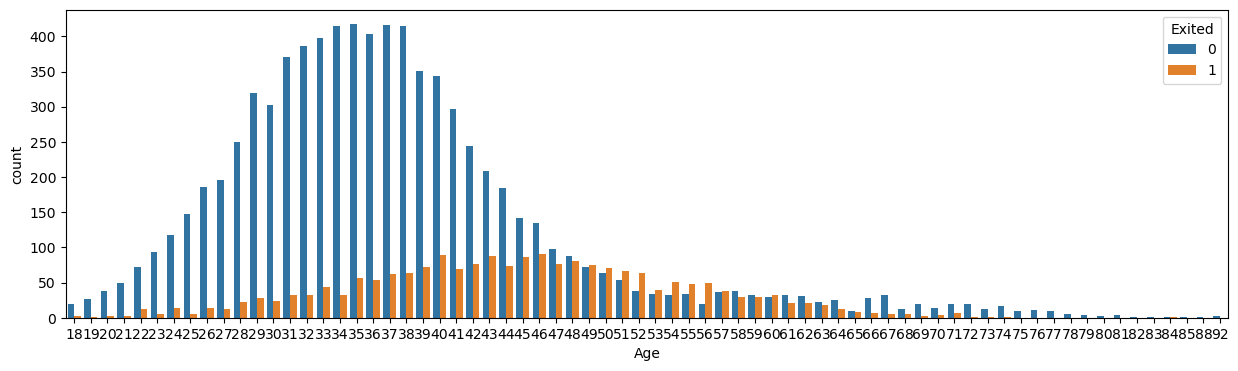

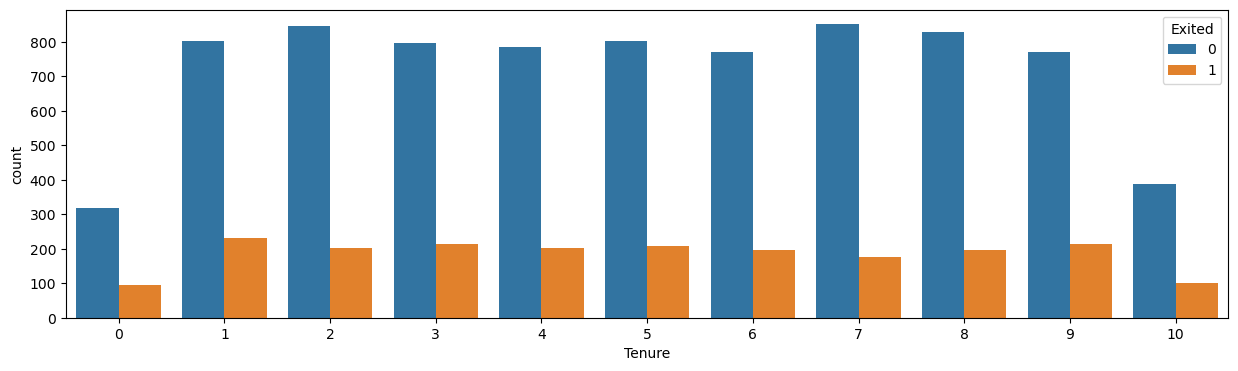

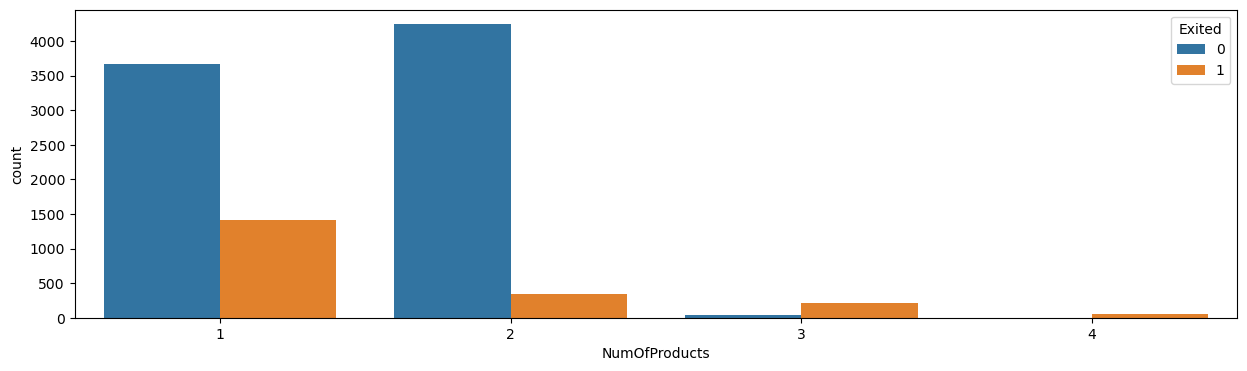

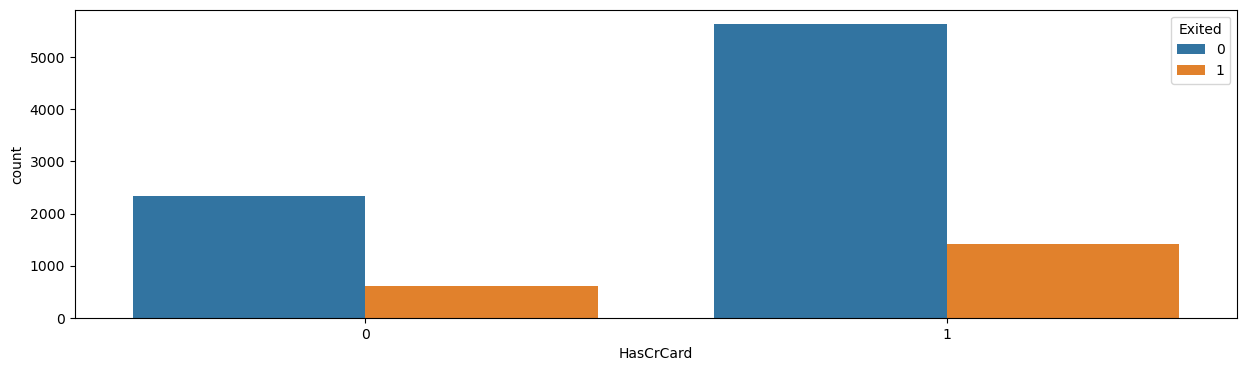

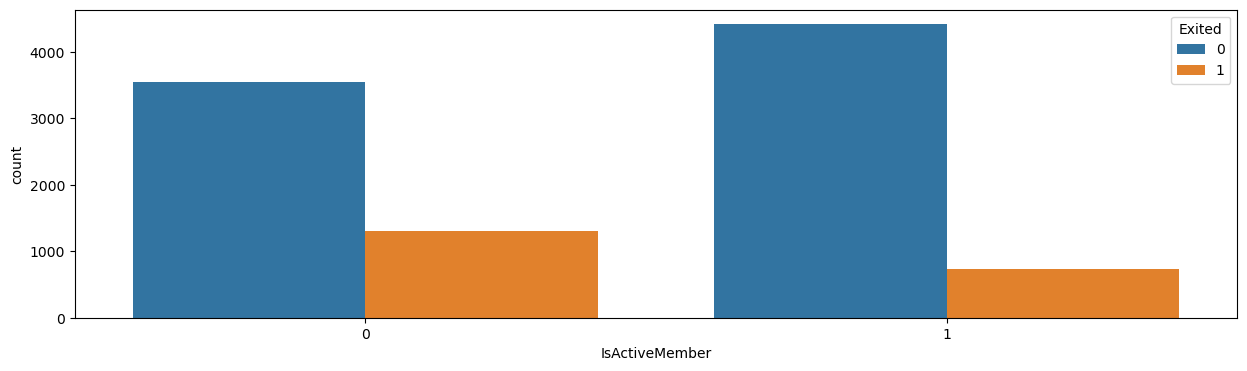

In [100]:
for idx , pred in enumerate(churn.drop(columns=['Exited','Balance','EstimatedSalary','CreditScore'])):
    plt.figure(idx,figsize=(15,4))
    sns.countplot(data=churn,x=pred,hue='Exited')

# Observations: 
1. Females are bit more likey to exit as compared to males. 
2. People having 1 product are more likely to exit. 
3. People having credit card are more likely to exit. 
4. Inactive members are more likely to exit. 
5. All tenure grps have similar likilihood of exiting. 
6. People between age between 38 and 53 have very high chance of exiting

# Logistic-Random Oversampling

In [101]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [102]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [103]:
lg_p1=lg.predict(x_te)

In [104]:
lg_cf1=confusion_matrix(y_te,lg_p1)
lg_cf1

array([[1055,  544],
       [ 546, 1041]], dtype=int64)

In [105]:
lg_ac1=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
lg_ac1

65.78782172002511

In [106]:
lg_re1=recall_score(y_te,lg_p1)

In [107]:
lg_pr1=precision_score(y_te,lg_p1)

In [108]:
lg_f1=f1_score(y_te,lg_p1,average='weighted')

In [109]:
print("\n",classification_report(y_te,lg_p1)) 
print("\nConfusion Matrix")
print(lg_cf1)


               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1599
           1       0.66      0.66      0.66      1587

    accuracy                           0.66      3186
   macro avg       0.66      0.66      0.66      3186
weighted avg       0.66      0.66      0.66      3186


Confusion Matrix
[[1055  544]
 [ 546 1041]]


# DT-Random oversampling

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [111]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [112]:
dt_p1=dt.predict(x_te)

In [113]:
dt_cf1=confusion_matrix(y_te,dt_p1)
dt_cf1

array([[1390,  209],
       [  27, 1560]], dtype=int64)

In [114]:
dt_ac1=dt_cf1.diagonal().sum()/dt_cf1.sum()*100
dt_ac1

92.5925925925926

In [115]:
dt_re1=recall_score(y_te,dt_p1)

In [116]:
dt_pr1=precision_score(y_te,dt_p1)

In [117]:
dt_f1=f1_score(y_te,dt_p1,average="weighted")

In [118]:
print("\n",classification_report(y_te,dt_p1))
print("\nConfusion Matrix")
print(dt_cf1)


               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1599
           1       0.88      0.98      0.93      1587

    accuracy                           0.93      3186
   macro avg       0.93      0.93      0.93      3186
weighted avg       0.93      0.93      0.93      3186


Confusion Matrix
[[1390  209]
 [  27 1560]]


# RF-Random oversampling

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [120]:
rf1.fit(x_tr,y_tr)

RandomForestClassifier()

In [121]:
rf_p1=rf1.predict(x_te)

In [122]:
rf_cf1=confusion_matrix(y_te,rf_p1)
rf_cf1

array([[1475,  124],
       [  20, 1567]], dtype=int64)

In [123]:
rf_ac1=rf_cf1.diagonal().sum()/rf_cf1.sum()*100
rf_ac1

95.48022598870057

In [124]:
rf_re1=recall_score(y_te,rf_p1)
rf_pr1=precision_score(y_te,rf_p1)
rf_f1=f1_score(y_te,rf_p1,average="weighted")

In [125]:
print("\n",classification_report(y_te,rf_p1))
print("\nConfusion Matrix")
print(rf_cf1)


               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1599
           1       0.93      0.99      0.96      1587

    accuracy                           0.95      3186
   macro avg       0.96      0.95      0.95      3186
weighted avg       0.96      0.95      0.95      3186


Confusion Matrix
[[1475  124]
 [  20 1567]]


# KNN-Random oversampling

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [127]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier()

In [128]:
knn_p1=knn.predict(x_te)

In [129]:
knn_cf1=confusion_matrix(y_te,knn_p1)
knn_cf1

array([[ 940,  659],
       [ 297, 1290]], dtype=int64)

In [130]:
knn_ac1=knn_cf1.diagonal().sum()/knn_cf1.sum()*100
knn_ac1

69.99372253609542

In [131]:
knn_re1=recall_score(y_te,knn_p1)
knn_pr1=precision_score(y_te,knn_p1)
knn_f1=f1_score(y_te,knn_p1,average="weighted")

In [132]:
print("\n",classification_report(y_te,knn_p1)) 
print("\nConfusion Matrix")
print(knn_cf1)


               precision    recall  f1-score   support

           0       0.76      0.59      0.66      1599
           1       0.66      0.81      0.73      1587

    accuracy                           0.70      3186
   macro avg       0.71      0.70      0.70      3186
weighted avg       0.71      0.70      0.70      3186


Confusion Matrix
[[ 940  659]
 [ 297 1290]]


# XGB-Random oversampling

In [133]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [134]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [135]:
xgb_p1=xgb.predict(x_te)

In [136]:
xgb_cf1=confusion_matrix(y_te,xgb_p1)
xgb_cf1

array([[1387,  212],
       [ 113, 1474]], dtype=int64)

In [137]:
xgb_ac1=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_ac1

89.79912115505336

In [138]:
xgb_re1=recall_score(y_te,xgb_p1)
xgb_pr1=precision_score(y_te,xgb_p1)
xgb_f1=f1_score(y_te,xgb_p1,average="weighted")

In [139]:
print("\n",classification_report(y_te,xgb_p1)) 
print("\nConfusion Matrix")
print(xgb_cf1)


               precision    recall  f1-score   support

           0       0.92      0.87      0.90      1599
           1       0.87      0.93      0.90      1587

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186


Confusion Matrix
[[1387  212]
 [ 113 1474]]


# SVM-Random oversampling

In [140]:
from sklearn.svm import SVC
svm=SVC()

In [141]:
svm.fit(x_tr,y_tr)

SVC()

In [142]:
svm_p1=svm.predict(x_te)

In [143]:
svm_cf1=confusion_matrix(y_te,svm_p1)
svm_cf1

array([[ 617,  982],
       [ 391, 1196]], dtype=int64)

In [144]:
svm_ac1=svm_cf1.diagonal().sum()/svm_cf1.sum()*100
svm_ac1

56.90521029504081

In [145]:
svm_re1=recall_score(y_te,svm_p1)
svm_pr1=precision_score(y_te,svm_p1)
svm_f1=f1_score(y_te,svm_p1,average="weighted")

In [146]:
print("\n",classification_report(y_te,svm_p1)) 
print("\nConfusion Matrix")
print(svm_cf1)


               precision    recall  f1-score   support

           0       0.61      0.39      0.47      1599
           1       0.55      0.75      0.64      1587

    accuracy                           0.57      3186
   macro avg       0.58      0.57      0.55      3186
weighted avg       0.58      0.57      0.55      3186


Confusion Matrix
[[ 617  982]
 [ 391 1196]]


# NB-Random oversampling

In [147]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [148]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [149]:
nb_p1=nb.predict(x_te)

In [150]:
nb_cf1=confusion_matrix(y_te,nb_p1)
nb_cf1

array([[880, 719],
       [732, 855]], dtype=int64)

In [151]:
nb_ac1=nb_cf1.diagonal().sum()/nb_cf1.sum()*100
nb_ac1

54.45699937225361

In [152]:
nb_re1=recall_score(y_te,nb_p1)
nb_pr1=precision_score(y_te,nb_p1)
nb_f1=f1_score(y_te,nb_p1,average="weighted")

In [153]:
print("\n",classification_report(y_te,nb_p1)) 
print("\nConfusion Matrix")
print(nb_cf1)


               precision    recall  f1-score   support

           0       0.55      0.55      0.55      1599
           1       0.54      0.54      0.54      1587

    accuracy                           0.54      3186
   macro avg       0.54      0.54      0.54      3186
weighted avg       0.54      0.54      0.54      3186


Confusion Matrix
[[880 719]
 [732 855]]


# Model2 After CI and EDA

In [154]:
algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
accuracy1=[lg_ac1,dt_ac1,rf_ac1,knn_ac1,xgb_ac1,svm_ac1,nb_ac1]
precision1=[lg_pr1,dt_pr1,rf_pr1,knn_pr1,xgb_pr1,svm_pr1,nb_pr1]
recall1=[lg_re1,dt_re1,rf_re1,knn_re1,xgb_re1,svm_re1,nb_re1]
f1_score1=[lg_f1,dt_f1,rf_f1,knn_f1,xgb_f1,svm_f1,nb_f1]
model2=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy1,"Precision":precision1,"Recall":recall1,"f1-score":f1_score1})
model2

,Algorithm,Accuracy,Precision,Recall,f1-score
0,Logistic Regression,65.787822,0.656782,0.655955,0.657877
1,Decision Tree,92.592593,0.881854,0.982987,0.925699
2,Random Forest,95.480226,0.926671,0.987398,0.954760
3,KNN,69.993723,0.661878,0.812854,0.696146
4,XGB,89.799121,0.874259,0.928796,0.897905
5,SVM,56.905210,0.549128,0.753623,0.554028
6,Naive Bayes,54.456999,0.543202,0.538752,0.544555


Conclusion : after Doining class imbalance and outlier treatment the accuracy of the model is inceases as compare to data Frame 1 Random Forest, Decision Tree and XGB model because the accuracy,F1 score,Recall,precesion of model is good as compare to other model.

# IMBLEARN 

In [155]:
# import imblearn
# from imblearn.over_sampling import RandomOverSampler

In [156]:
# d_x1=churn.iloc[:,0:-1]
# d_y1=churn.iloc[:,-1]

In [157]:
# d_y1.value_counts()

In [158]:
# a1=RandomOverSampler(random_state=42)
# x2,y2=a1.fit_resample(d_x1,d_y1)

In [159]:
# x2.shape,y2.shape

In [160]:
#y2.value_counts()

In [161]:
#xtr2,xte2,ytr2,yte2=train_test_split(x2,y2,test_size=0.2,random_state=100)
#xtr2.shape,xte2.shape,ytr2.shape,yte2.shape

In [162]:
#x2.skew()

In [163]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=x2,y="CreditScore")

In [164]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=x2,y="Age")

In [165]:
# from scipy import stats

# num_cols = ['CreditScore', 'Age']

# # Detect and handle outliers
# for col in num_cols:
#     # Calculate the IQR (Interquartile Range)
#     Q1 = x2[col].quantile(0.25)
#     Q3 = x2[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identify outliers
#     outliers = x2[(x2[col] < lower_bound) | (x2[col] > upper_bound)]

#     # Replace outliers with appropriate values or remove them
#     if col == 'CreditScore':
#         x2.loc[(x2[col] < lower_bound) | (x2[col] > upper_bound), col] = x2[col].median()
#     elif col == 'Age':
#         # Instead of replacing with median, you can remove outliers in 'Age'
#         x2 = x2[(x2[col] >= lower_bound) & (x2[col] <= upper_bound)]

#     # Measure skewness
#     skewness = stats.skew(x2[col])
#     print(f"Skewness for {col}: {skewness}")

In [166]:
# fig=plt.figure(figsize=(5,5))
# sns.boxplot(data=x2,y="CreditScore")

In [167]:
# fig=plt.figure(figsize=(5,5))
# sns.boxplot(data=x2,y="Age")

In [168]:
# x2.skew()

In [169]:
# sns.distplot(x2.CreditScore) 

In [170]:
# sns.distplot(x2.Age) 

# Logistic Regression

In [171]:
# from sklearn.linear_model import LogisticRegression
# lg=LogisticRegression()

In [172]:
#lg.fit(xtr2,ytr2)

In [173]:
#lg_p3=lg.predict(xte2)

In [174]:
# lg_cf3=confusion_matrix(yte2,lg_p3)
# lg_cf3

In [175]:
# lg_ac3=lg_cf3.diagonal().sum()/lg_cf3.sum()*100
# lg_ac3

In [176]:
# lg_a3=f1_score(yte2,lg_p3)
# lg_b3=precision_score(yte2,lg_p3)
# lg_c3=recall_score(yte2,lg_p3)

In [177]:
# print("\n",classification_report(yte2,lg_p3))
# print("\nConfusion Matrix")
# print(lg_cf3)

# Decision Tree

In [178]:
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()

In [179]:
# dt.fit(xtr2,ytr2)

In [180]:
# dt_p3=dt.predict(xte2)

In [181]:
# dt_cf3=confusion_matrix(yte2,dt_p3)
# dt_cf3

In [182]:
# dt_ac3=dt_cf3.diagonal().sum()/dt_cf3.sum()*100
# dt_ac3

In [183]:
# dt_a3=f1_score(yte2,dt_p3)
# dt_b3=precision_score(yte2,dt_p3)
# dt_c3=recall_score(yte2,dt_p3)

In [184]:
# print(classification_report(yte2,dt_p3))
# print("\nConfusion Matrix")
# print(dt_cf3)

# Random Forest

In [185]:
# from sklearn.ensemble import RandomForestClassifier
# rf=RandomForestClassifier()

In [186]:
# rf.fit(xtr2,ytr2)

In [187]:
# rf_p3=rf.predict(xte2)

In [188]:
# rf_cf3=confusion_matrix(yte2,rf_p3)
# rf_cf3

In [189]:
# rf_ac3=rf_cf3.diagonal().sum()/rf_cf3.sum()*100
# rf_ac3

In [190]:
# rf_a3=f1_score(yte2,rf_p3)
# rf_b3=precision_score(yte2,rf_p3)
# rf_c3=recall_score(yte2,rf_p3)

In [191]:
# print(classification_report(yte2,rf_p3))
# print("\nConfusion Matrix")
# print(rf_cf3)

# KNN

In [192]:
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier()

In [193]:
# knn.fit(xtr2,ytr2)

In [194]:
# knn_p3=knn.predict(xte2)

In [195]:
# knn_cf3=confusion_matrix(yte2,knn_p3)
# knn_cf3

In [196]:
# knn_ac3=knn_cf3.diagonal().sum()/knn_cf3.sum()*100
# knn_ac3

In [197]:
# knn_a3=f1_score(yte2,knn_p3)
# knn_b3=precision_score(yte2,knn_p3)
# knn_c3=recall_score(yte2,knn_p3)

In [198]:
# print(classification_report(yte2,knn_p3))
# print("\nConfusion Matrix")
# print(knn_cf3)

# XGB

In [199]:
# import xgboost
# from xgboost import XGBClassifier
# xgb=XGBClassifier()

In [200]:
# xgb.fit(xtr2,ytr2)

In [201]:
# xgb_p3=xgb.predict(xte2)

In [202]:
# xgb_cf3=confusion_matrix(yte2,xgb_p3)
# xgb_cf3

In [203]:
# xgb_ac3=xgb_cf3.diagonal().sum()/xgb_cf3.sum()*100
# xgb_ac3

In [204]:
# xgb_a3=f1_score(yte2,xgb_p3)
# xgb_b3=precision_score(yte2,xgb_p3)
# xgb_c3=recall_score(yte2,xgb_p3)

In [205]:
# print(classification_report(yte2,xgb_p3))
# print("\nConfusion Matrix")
# print(xgb_cf3)

# SVM

In [206]:
# from sklearn.svm import SVC
# svm=SVC()

In [207]:
# svm.fit(xtr2,ytr2)

In [208]:
# svm_p3=svm.predict(xte2)

In [209]:
# svm_cf3=confusion_matrix(yte2,svm_p3)
# svm_cf3

In [210]:
# svm_ac3=svm_cf3.diagonal().sum()/svm_cf3.sum()*100
# svm_ac3

In [211]:
# svm_a3=f1_score(yte2,svm_p3)
# svm_b3=precision_score(yte2,svm_p3)
# svm_c3=recall_score(yte2,svm_p3)

In [212]:
# print(classification_report(yte2,svm_p3))
# print("\nConfusion Matrix")
# print(svm_cf3)

# Naive Bayes

In [213]:
# from sklearn.naive_bayes import MultinomialNB
# nb=MultinomialNB()

In [214]:
# nb.fit(xtr2,ytr2)

In [215]:
# nb_p3=nb.predict(xte2)

In [216]:
# nb_cf3=confusion_matrix(yte2,nb_p3)
# nb_cf3

In [217]:
# nb_ac3=nb_cf3.diagonal().sum()/nb_cf3.sum()*100
# nb_ac3

In [218]:
# nb_a3=f1_score(yte2,nb_p3)
# nb_b3=precision_score(yte2,nb_p3)
# nb_c3=recall_score(yte2,nb_p3)

In [219]:
# print(classification_report(yte2,nb_p3))
# print("\nConfusion Matrix")
# print(nb_cf3)

In [220]:
# algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
# accuracy=[lg_ac3,dt_ac3,rf_ac3,knn_ac3,xgb_ac3,svm_ac3,nb_ac3,]
# f1=[lg_a3,dt_a3,rf_a3,knn_a3,xgb_a3,svm_a3,nb_a3]
# precision=[lg_b3,dt_b3,rf_b3,knn_b3,xgb_b3,svm_b3,nb_b3]
# recall=[lg_c3,dt_c3,rf_c3,knn_c3,xgb_c3,svm_c3,nb_c3]

In [221]:
# model3=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy,"F1-score":f1,"Precision":precision,"Recall":recall})
# model3

# Feature Selection

# RFE 

In [222]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rfe=RFE(rf1,n_features_to_select=5)

In [223]:
rfe.fit(class1_0.iloc[:,:-1],class1_0.iloc[:,-1])

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [224]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True])

In [225]:
f1=pd.DataFrame({'feature':list(rfe.support_),'col':list(class1_0.iloc[:,:-1].columns)})
f1

,feature,col
0,True,CreditScore
1,False,Geography
2,False,Gender
3,True,Age
4,False,Tenure
5,True,Balance
6,True,NumOfProducts
7,False,HasCrCard
8,False,IsActiveMember
9,True,EstimatedSalary


In [226]:
class1_0.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [227]:
# List of columns to drop
df=class1_0.drop(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'],axis=1)

In [228]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
Exited             0
dtype: int64

In [229]:
n_x=df.iloc[:,:-1]
n_y=df.iloc[:,-1]

In [230]:
xtr,xte,ytr,yte=train_test_split(n_x,n_y,test_size=0.2,random_state=101)
xtr.shape,xte.shape,ytr.shape,yte.shape

((12740, 5), (3186, 5), (12740,), (3186,))

In [231]:
# Logistic-FS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
print(lg)
lg.fit(xtr,ytr)
lg_f=lg.predict(xte)
fcf1=confusion_matrix(yte,lg_f)
fac1=fcf1.diagonal().sum()/fcf1.sum()*100
fre1=recall_score(yte,lg_f)
fpr1=precision_score(yte,lg_f)
ff1=f1_score(yte,lg_f,average='weighted')
print("\n",classification_report(yte,lg_f)) 
print("\nConfusion Matrix")
print(fcf1)

LogisticRegression()

               precision    recall  f1-score   support

           0       0.63      0.64      0.64      1579
           1       0.64      0.64      0.64      1607

    accuracy                           0.64      3186
   macro avg       0.64      0.64      0.64      3186
weighted avg       0.64      0.64      0.64      3186


Confusion Matrix
[[1013  566]
 [ 583 1024]]


In [232]:
print(dt)
dt.fit(xtr,ytr)
dt_f=dt.predict(xte)
fcf2=confusion_matrix(yte,dt_f)
fac2=fcf2.diagonal().sum()/fcf2.sum()*100
fre2=recall_score(yte,dt_f)
fpr2=precision_score(yte,dt_f)
ff2=f1_score(yte,dt_f,average='weighted')
print("\n",classification_report(yte,dt_f)) 
print("\nConfusion Matrix")
print(fcf2)

DecisionTreeClassifier()

               precision    recall  f1-score   support

           0       0.96      0.79      0.87      1579
           1       0.83      0.97      0.89      1607

    accuracy                           0.88      3186
   macro avg       0.89      0.88      0.88      3186
weighted avg       0.89      0.88      0.88      3186


Confusion Matrix
[[1249  330]
 [  46 1561]]


In [233]:
print(rf)
rf.fit(xtr,ytr)
rf_f=rf.predict(xte)
fcf3=confusion_matrix(yte,rf_f)
fac3=fcf3.diagonal().sum()/fcf3.sum()*100
fre3=recall_score(yte,rf_f)
fpr3=precision_score(yte,rf_f)
ff3=f1_score(yte,rf_f,average='weighted')
print("\n",classification_report(yte,rf_f)) 
print("\nConfusion Matrix")
print(fcf3)

RandomForestClassifier()

               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1579
           1       0.89      0.97      0.93      1607

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186


Confusion Matrix
[[1377  202]
 [  46 1561]]


In [234]:
print(knn)
knn.fit(xtr,ytr)
knn_f=knn.predict(xte)
fcf4=confusion_matrix(yte,knn_f)
fac4=fcf4.diagonal().sum()/fcf4.sum()*100
fre4=recall_score(yte,knn_f)
fpr4=precision_score(yte,knn_f)
ff4=f1_score(yte,knn_f,average='weighted')
print("\n",classification_report(yte,knn_f)) 
print("\nConfusion Matrix")
print(fcf4)

KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.76      0.57      0.65      1579
           1       0.66      0.82      0.73      1607

    accuracy                           0.69      3186
   macro avg       0.71      0.69      0.69      3186
weighted avg       0.71      0.69      0.69      3186


Confusion Matrix
[[ 895  684]
 [ 289 1318]]


In [235]:
print(xgb)
xgb.fit(xtr,ytr)
xgb_f=xgb.predict(xte)
fcf5=confusion_matrix(yte,knn_f)
fac5=fcf5.diagonal().sum()/fcf5.sum()*100
fre5=recall_score(yte,xgb_f)
fpr5=precision_score(yte,xgb_f)
ff5=f1_score(yte,xgb_f,average='weighted')
print("\n",classification_report(yte,xgb_f)) 
print("\nConfusion Matrix")
print(fcf5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1579
           1       0.82      0.86      0.84      1607

    accuracy                           0.83      3186
   macro avg       0.83     

In [236]:
from sklearn.svm import SVC
svm=SVC()
print(svm)
svm.fit(xtr,ytr)
svm_f=svm.predict(xte)
fcf6=confusion_matrix(yte,svm_f)
fac6=fcf6.diagonal().sum()/fcf6.sum()*100
fre6=recall_score(yte,svm_f)
fpr6=precision_score(yte,svm_f)
ff6=f1_score(yte,svm_f,average='weighted')
print("\n",classification_report(yte,svm_f)) 
print("\nConfusion Matrix")
print(fcf6)

SVC()

               precision    recall  f1-score   support

           0       0.61      0.38      0.47      1579
           1       0.56      0.76      0.64      1607

    accuracy                           0.57      3186
   macro avg       0.58      0.57      0.55      3186
weighted avg       0.58      0.57      0.56      3186


Confusion Matrix
[[ 605  974]
 [ 392 1215]]


In [237]:
print(nb)
nb.fit(xtr,ytr)
nb_f=nb.predict(xte)
fcf7=confusion_matrix(yte,nb_f)
fac7=fcf7.diagonal().sum()/fcf7.sum()*100
fre7=recall_score(yte,nb_f)
fpr7=precision_score(yte,nb_f)
ff7=f1_score(yte,nb_f,average='weighted')
print("\n",classification_report(yte,nb_f)) 
print("\nConfusion Matrix")
print(fcf7)

MultinomialNB()

               precision    recall  f1-score   support

           0       0.54      0.54      0.54      1579
           1       0.55      0.56      0.55      1607

    accuracy                           0.55      3186
   macro avg       0.55      0.55      0.55      3186
weighted avg       0.55      0.55      0.55      3186


Confusion Matrix
[[847 732]
 [713 894]]


In [238]:
algo=['Logistic','Decision Tree','Random Forest','KNN','xgb','SVM','NB']
accuracy3=[fac1,fac2,fac3,fac4,fac5,fac6,fac7]
precision3=[fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
recall3=[fre1,fre2,fre3,fre4,fre5,fre6,fre7]
f1_score3=[ff1,ff2,ff3,ff4,ff5,ff6,ff7]
model4=pd.DataFrame({"Model":algo,"Accuracy":accuracy3,"Precision":precision3,"Recall":recall3,"f1-score":f1_score3})
model4

,Model,Accuracy,Precision,Recall,f1-score
0,Logistic,63.935970,0.644025,0.637212,0.639366
1,Decision Tree,88.198368,0.825489,0.971375,0.880943
2,Random Forest,92.215945,0.885423,0.971375,0.921939
3,KNN,69.460138,0.658342,0.820162,0.689484
4,xgb,69.460138,0.815141,0.864343,0.832505
5,SVM,57.124922,0.555048,0.756067,0.555683
6,NB,54.645323,0.549815,0.556316,0.546413


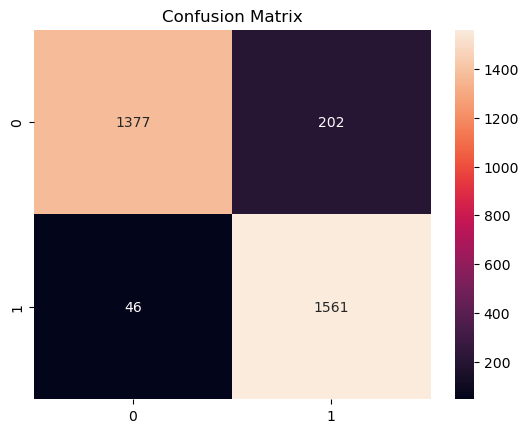

In [239]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(yte,rf_f)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

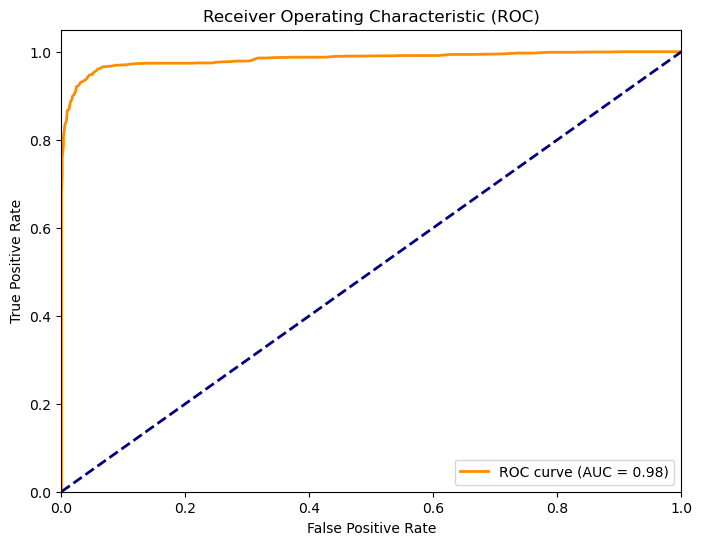

In [240]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc

clf = RandomForestClassifier()

# Train the classifier
clf.fit(xtr,ytr)

# Predict probabilities for the positive class (class 1)
rf_f = clf.predict_proba(xte)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(yte,rf_f)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Conclusion:After Doing the feature selection the By comparing dataframe 2 and dataframe 3 performance of the model is not increases this means that feature selection does not any affect on the data in this case we can conclude that Random Forest and Decison tree is good fitted data